In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import warnings
import os
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)':'AnnualIncome',
                   'Spending Score (1-100)':'SpendingScore'},inplace=True)

In [5]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(f'CustomerID :{df.CustomerID.nunique()}')
print(f'Gender :{df.Gender.nunique()}')
print(f'Age :{df.Age.nunique()}')
print(df.shape[0])

CustomerID :200
Gender :2
Age :51
200


In [7]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df2 = df.copy()
cat_cols = ['Gender']
con_cols = ['Age','AnnualIncome','SpendingScore']

<AxesSubplot:>

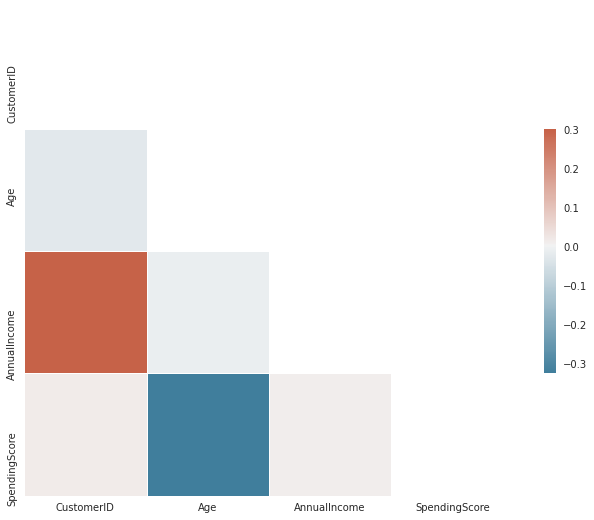

In [10]:
# compute the corr matrix

corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

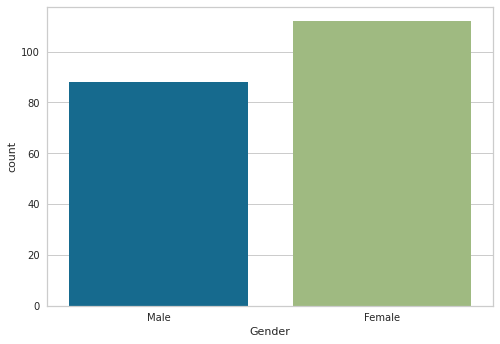

In [11]:
sns.countplot(data=df,x='Gender');

<Figure size 576x576 with 0 Axes>

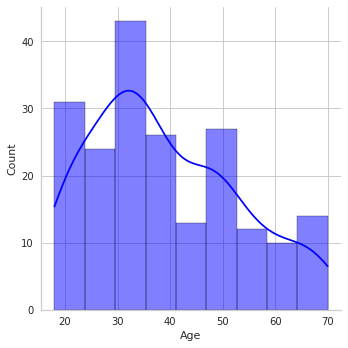

In [12]:
fig = plt.figure(figsize=(8,8))
ax = sns.displot(data=df,x='Age',kde=True,color='blue');

<Figure size 576x576 with 0 Axes>

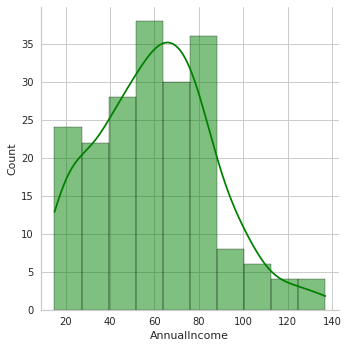

In [13]:
fig = plt.figure(figsize=(8,8))
sns.displot(data=df,x='AnnualIncome',kde=True,color='green');

<Figure size 576x576 with 0 Axes>

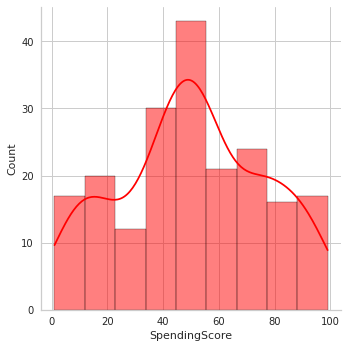

In [14]:
fig = plt.figure(figsize=(8,8))
sns.displot(data=df,x='SpendingScore',kde=True,color='red');

<Figure size 864x864 with 0 Axes>

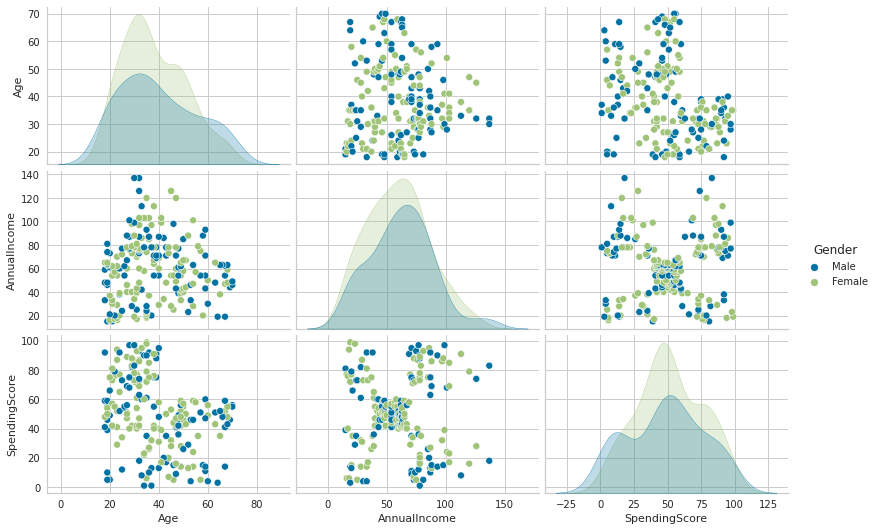

In [15]:
fig = plt.figure(figsize=(12,12))
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5);

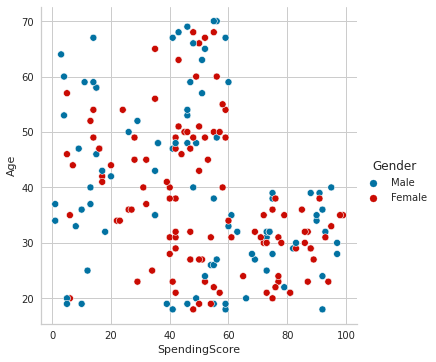

In [16]:
sns.relplot(
    data=df, x="SpendingScore", y="Age",hue="Gender",
    palette=["b", "r"], sizes=(10, 100)
);

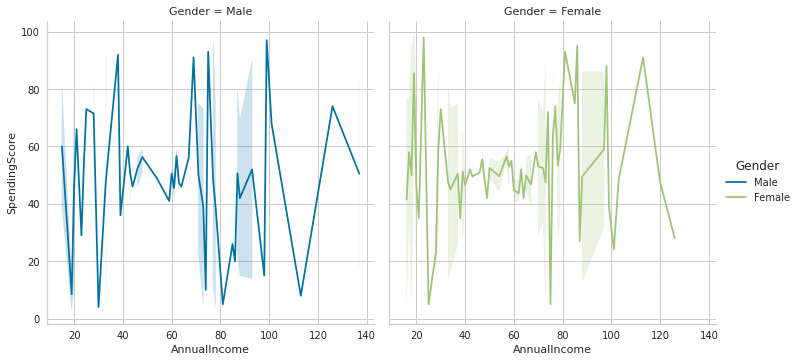

In [17]:
ax = sns.relplot(
    data=df, x="AnnualIncome", y="SpendingScore", col="Gender",
    hue="Gender", kind="line");

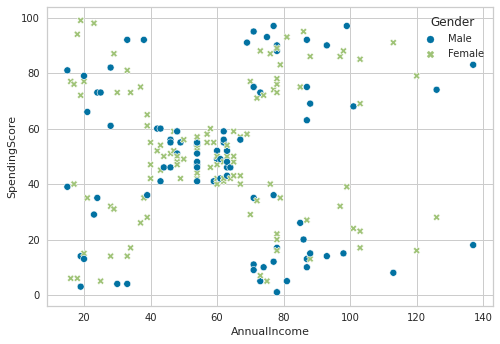

In [18]:
sns.scatterplot(data=df, y="SpendingScore", x="AnnualIncome", hue="Gender", style="Gender");

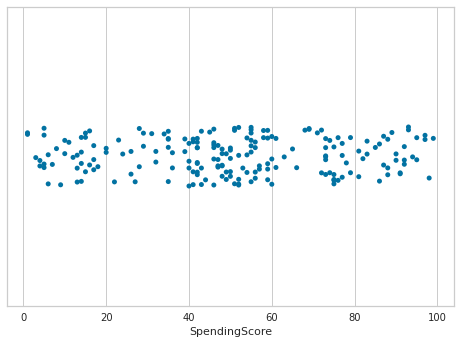

In [19]:
ax = sns.stripplot(x=df["SpendingScore"])

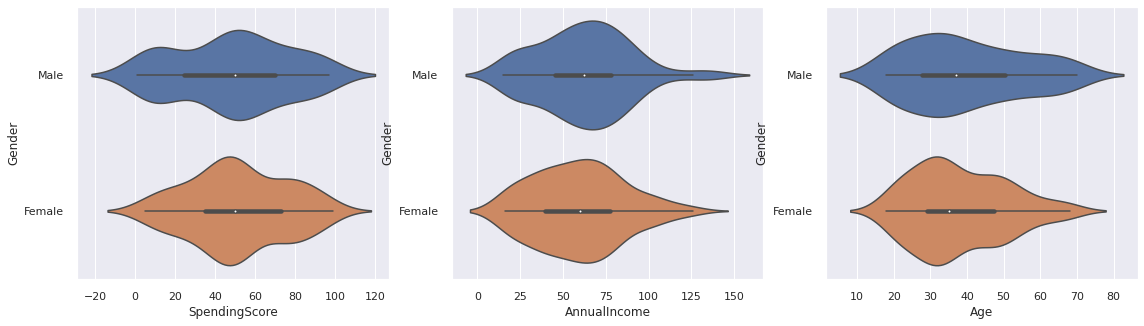

In [20]:
plt.figure(figsize=(19,5))
sns.set_theme(style='darkgrid')
plt.subplot(1,3,1)
sns.violinplot(x='SpendingScore',y='Gender',data=df)
plt.subplot(1,3,2)
sns.violinplot(x='AnnualIncome',y='Gender',data=df)
plt.subplot(1,3,3)
sns.violinplot(x='Age',y='Gender',data=df)
plt.show()

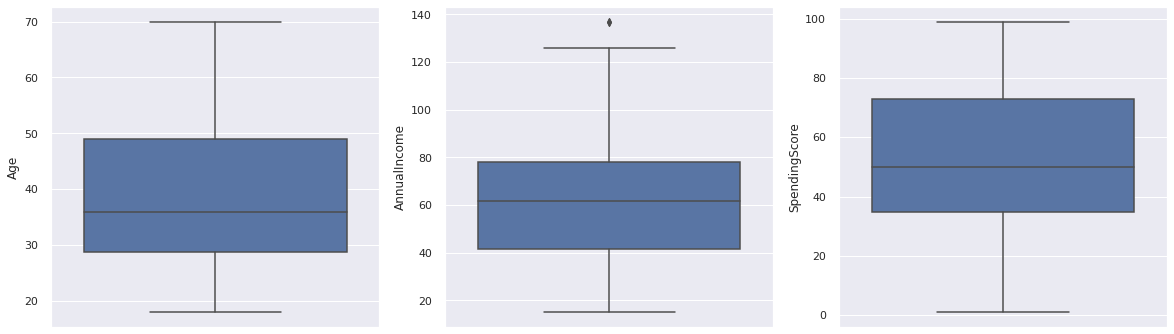

In [21]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
sns.boxplot(y='Age',data=df);
ax2 = fig.add_subplot(3,3,2)
sns.boxplot(y='AnnualIncome',data=df);
ax3 = fig.add_subplot(3,3,3)
sns.boxplot(y='SpendingScore',data=df);

In [22]:
shapiro_test = shapiro(df['SpendingScore'])

print(f'W: {shapiro_test[0]}')
print(f'p-Value: {shapiro_test[1]}')

# H0: Distribution is Normal!
# H1: Distribution is not Normal!

# Fail to Reject H0
# Reject H0
    
if shapiro_test[1] > 0.05:
  print('Fail to Reject H0 and Distribution is Normal!')
else:
  print('Reject H0 and Distribution is not Normal! ') 

W: 0.9694609642028809
p-Value: 0.0002423154073767364
Reject H0 and Distribution is not Normal! 


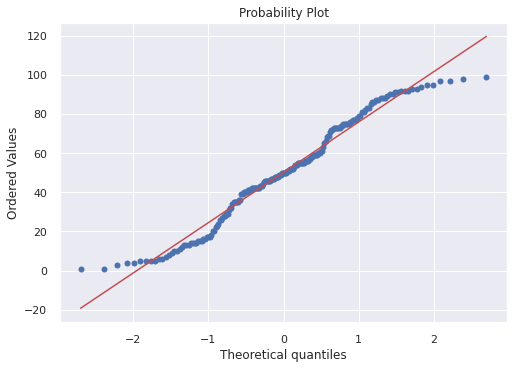

In [23]:
stats.probplot(df['SpendingScore'],plot=pylab,dist='norm')
pylab.show()

In [24]:
shapiro_test = shapiro(df['AnnualIncome'])

print(f'W: {shapiro_test[0]}')
print(f'p-Value: {shapiro_test[1]}')

# H0: Distribution is Normal!
# H1: Distribution is not Normal!

# Fail to Reject H0
# Reject H0
    
if shapiro_test[1] > 0.05:
  print('Fail to Reject H0 and Distribution is Normal!')
else:
  print('Reject H0 and Distribution is not Normal! ') 

W: 0.9783905148506165
p-Value: 0.0035373352002352476
Reject H0 and Distribution is not Normal! 


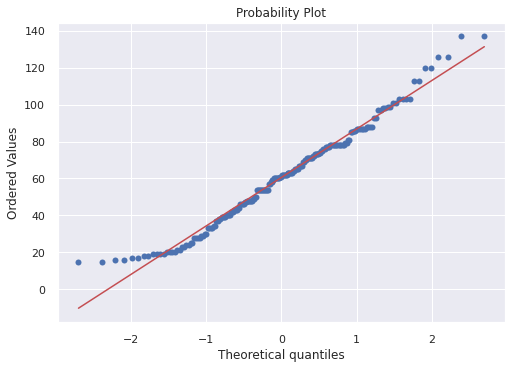

In [25]:
stats.probplot(df['AnnualIncome'],plot=pylab,dist='norm')
pylab.show()

In [26]:
shapiro_test = shapiro(df['Age'])

print(f'W: {shapiro_test[0]}')
print(f'p-Value: {shapiro_test[1]}')

# H0: Distribution is Normal!
# H1: Distribution is not Normal!

# Fail to Reject H0
# Reject H0
    
if shapiro_test[1] > 0.05:
  print('Fail to Reject H0 and Distribution is Normal!')
else:
  print('Reject H0 and Distribution is not Normal! ') 

W: 0.9516186714172363
p-Value: 2.711100023589097e-06
Reject H0 and Distribution is not Normal! 


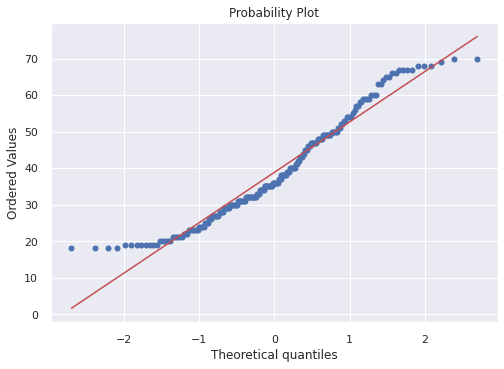

In [27]:
stats.probplot(df['Age'],plot=pylab,dist='norm')
pylab.show()

In [28]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
df.groupby(df.Gender)['AnnualIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


In [30]:
df.loc[df['Gender'] == 'Female','Gender'] = 0
df.loc[df['Gender'] == 'Male','Gender'] = 1

In [31]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


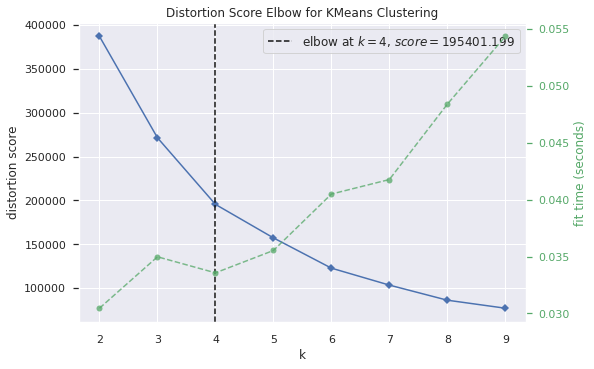

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans,k=(2,10))
elbow.fit(df)
elbow.poof()

In [33]:
kmeans = KMeans(n_clusters=4).fit(df)

In [34]:
result = pd.DataFrame({'Clusters':kmeans.labels_})

In [35]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

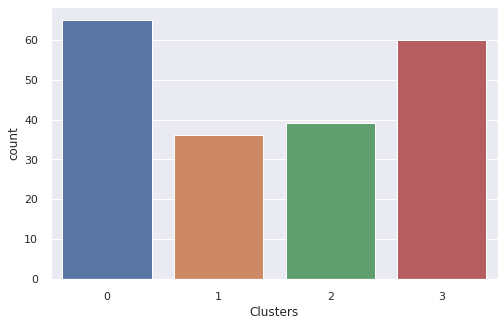

In [36]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=result,x='Clusters')

In [37]:
resultend = pd.DataFrame({'CustomerID':df.CustomerID,'Clusters':kmeans.labels_+1})

In [38]:
resultend.head(200).T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
CustomerID,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
Clusters,4,4,4,4,4,4,4,4,4,4,...,2,3,2,3,2,3,2,3,2,3


<Figure size 648x648 with 0 Axes>

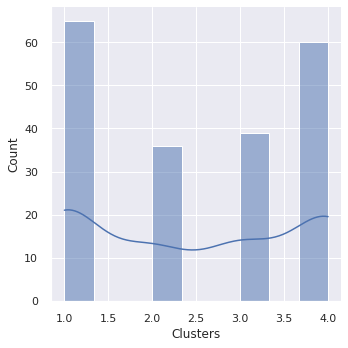

In [39]:
fig = plt.figure(figsize=(9,9))
ax = sns.displot(data=resultend,x='Clusters',kde=True,kind='hist')

In [40]:
kmeans_end = df.drop(['CustomerID', 'Gender'], axis=1)

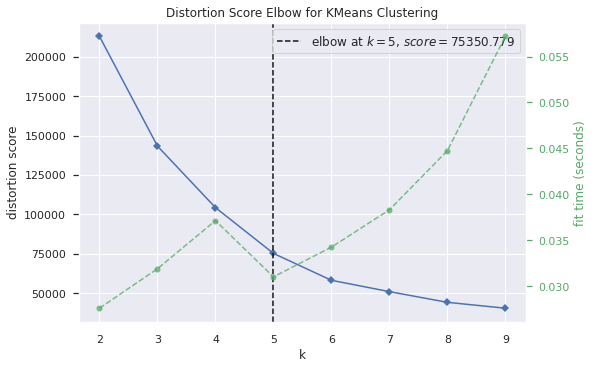

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans,k=(2,10))
elbow.fit(kmeans_end)
elbow.poof()

In [42]:
kmeansend = KMeans(n_clusters=5).fit(kmeans_end)

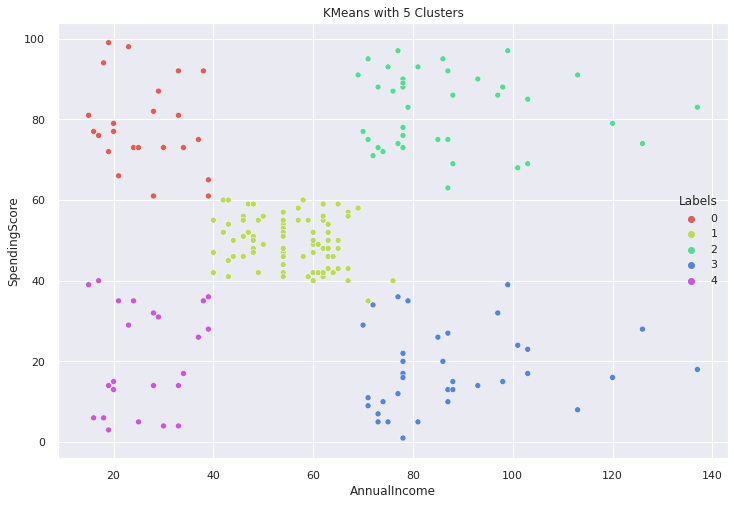

In [43]:
kmeans_end['Labels'] = kmeansend.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(kmeans_end['AnnualIncome'], kmeans_end['SpendingScore'], hue=kmeans_end['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

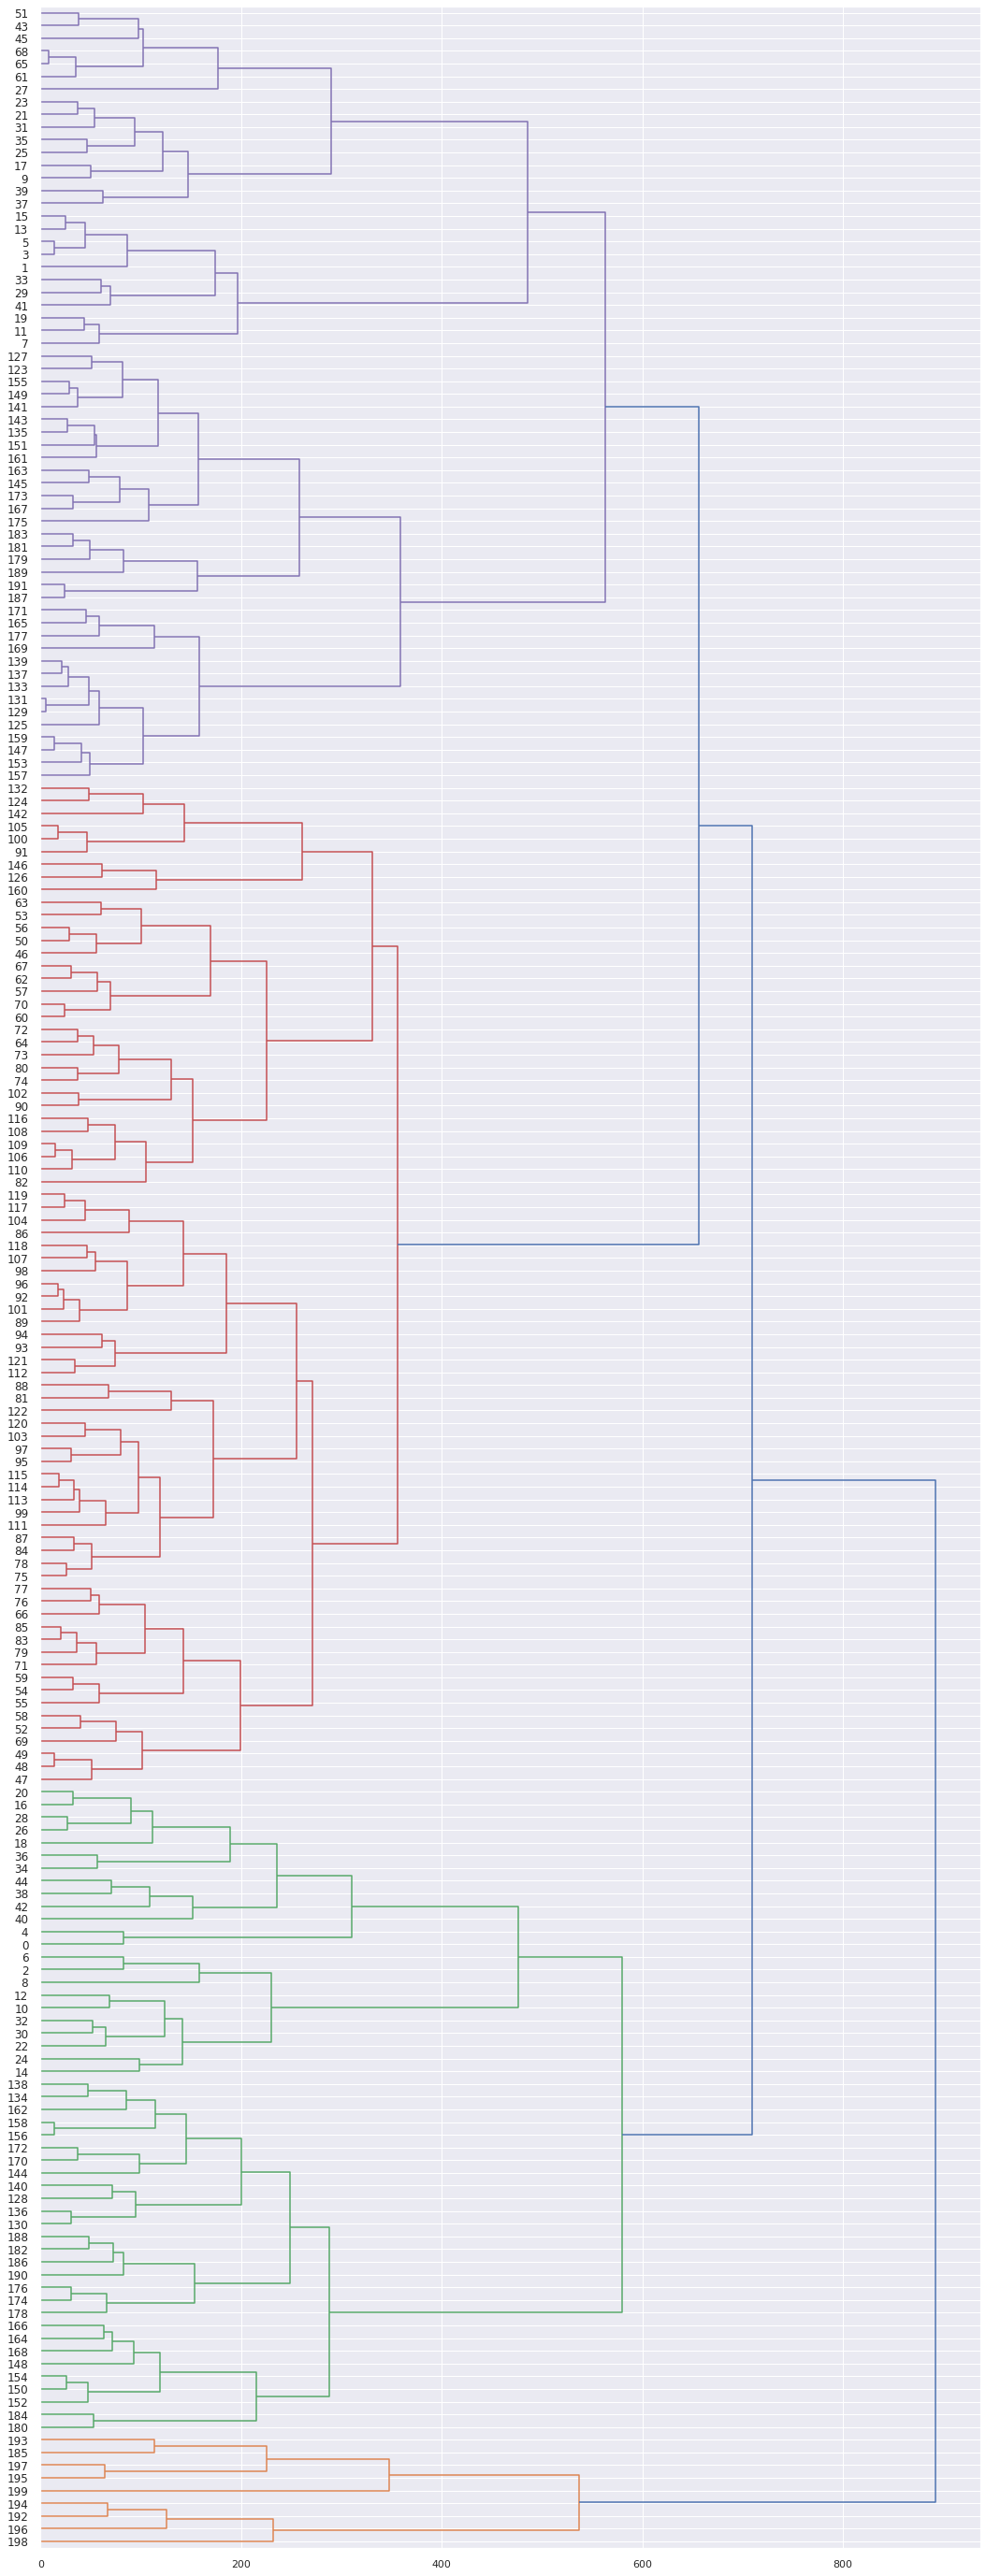

In [44]:
# Dendrogram 
dist = distance_matrix(kmeans_end, kmeans_end)
dendrogram1 = hierarchy.linkage(dist, 'complete')
plt.figure(figsize=(18, 50))
dendrogram2 = hierarchy.dendrogram(dendrogram1, leaf_rotation=0, leaf_font_size=12, orientation='right')

***Thanks for looking. Please vote.***